# Trading Trends Explorer — Multi-Stock Analysis

### Stocks: TCS.NS, INFY.NS, RELIANCE.NS

#### key defanitaions
##### Moving Average (MA): The average stock price over a set period to smooth out daily fluctuations and reveal the trend.
##### Volatility: How much a stock’s price changes over time, showing its risk level.
##### Daily Return: The percentage change in a stock’s price from one day to the next.

### importing library 

In [261]:
import pandas as pd
import yfinance as yf

## Data collection
#### ->stock data fetched using `yfinance`


In [262]:
stock_DF= yf.download(["TCS.NS","INFY.NS","RELIANCE.NS"],start="2020-01-01",auto_adjust=True)

[*********************100%***********************]  3 of 3 completed


In [263]:
stock_DF.to_csv(r"D:\Data_science_projects\Trading_Trends_Explorer\Data\Datastock_DF.csv")
stock_DF.tail()


Price             Close                                   High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2025-09-18  1540.599976  1415.000000  3176.699951  1555.000000  1422.000000   
2025-09-19  1540.199951  1407.400024  3169.199951  1551.300049  1417.000000   
2025-09-22  1499.500000  1390.599976  3073.800049  1514.699951  1410.699951   
2025-09-23  1497.500000  1389.800049  3062.399902  1513.000000  1395.000000   
2025-09-24  1494.599976  1383.000000  3035.399902  1496.699951  1396.000000   

Price                            Low                                   Open  \
Ticker           TCS.NS      INFY.NS  RELIANCE.NS       TCS.NS      INFY.NS   
Date                                                                          
2025-09-18  3203.000000  1538.500000  1410.699951  3161.399902  1550.000000   
2025-09-19  3180.500000  1520.099976  1403.599976  3144.000000  1544.599976   
2025-09-22  3106.899902  1482.000000  1388.000000  3065.000000  1482.699951   
2025-09-23  3080.699951  1493.000000  1376.800049  3052.000000  1493.000000   
2025-09-24  3057.000000  1482.699951  1380.400024  3033.000000  1487.199951   

Price                              Volume                       
Ticker      RELIANCE.NS  TCS.NS   INFY.NS RELIANCE.NS   TCS.NS  
Date                                                            
2025-09-18  1420.400024  3185.0   9331945     9332642  2633138  
2025-09-19  1414.900024  3170.0  12988129    13461373  4901694  
2025-09-22  1403.900024  3095.0  15655204     7757970  3634901  
2025-09-23  1391.000000  3070.0   9832164    14014702  3177741  
2025-09-24  1385.300049  3050.0   4937004     5922759  1625714

### handling missing value 

In [264]:
stock_DF.isnull().sum()

Price   Ticker     
Close   INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
High    INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Low     INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Open    INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Volume  INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
dtype: int64

### filling missing value using interpolate

In [265]:
stock_DF=stock_DF.interpolate()


In [266]:
stock_DF.isnull().sum()

Price   Ticker     
Close   INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
High    INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Low     INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Open    INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
Volume  INFY.NS        0
        RELIANCE.NS    0
        TCS.NS         0
dtype: int64

In [267]:
stock_DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1422 entries, 2020-01-01 to 2025-09-24
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, INFY.NS)       1422 non-null   float64
 1   (Close, RELIANCE.NS)   1422 non-null   float64
 2   (Close, TCS.NS)        1422 non-null   float64
 3   (High, INFY.NS)        1422 non-null   float64
 4   (High, RELIANCE.NS)    1422 non-null   float64
 5   (High, TCS.NS)         1422 non-null   float64
 6   (Low, INFY.NS)         1422 non-null   float64
 7   (Low, RELIANCE.NS)     1422 non-null   float64
 8   (Low, TCS.NS)          1422 non-null   float64
 9   (Open, INFY.NS)        1422 non-null   float64
 10  (Open, RELIANCE.NS)    1422 non-null   float64
 11  (Open, TCS.NS)         1422 non-null   float64
 12  (Volume, INFY.NS)      1422 non-null   int64  
 13  (Volume, RELIANCE.NS)  1422 non-null   int64  
 14  (Volume, TCS.NS)       1422 non-null  

### coverting multindex column into single index for better engineering

In [268]:
stock_DF.columns = ['_'.join(col) for col in stock_DF.columns]
stock_DF


,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_INFY.NS,Low_RELIANCE.NS,Low_TCS.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
Date,,,,,,,,,,,,,,,
2020-01-01,646.518677,675.324158,1986.125366,649.282536,683.152852,2001.060527,642.745829,673.490062,1973.663889,644.895492,679.081936,1986.491788,2112415,14004468,1354908
2020-01-02,644.632385,686.821228,1977.007935,649.984559,689.348791,1997.440987,641.298242,676.397899,1969.265427,648.317514,676.397899,1997.440987,5658200,17710316,2380752
2020-01-03,654.547119,687.648804,2016.408203,656.301937,689.661895,2036.887117,643.930492,681.318729,1982.826685,643.930492,685.792252,1982.826685,7882938,20984698,4655761
2020-01-06,648.273560,671.700623,2016.225342,661.390834,683.510705,2039.590448,646.211670,670.134872,2004.726000,654.634774,679.976657,2020.394454,6519403,24519177,3023209
2020-01-07,638.665833,682.034546,2021.172729,651.563698,686.463335,2029.235800,636.209045,677.068889,2000.968747,647.527639,679.529321,2016.270551,7899363,16683622,2429317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-18,1540.599976,1415.000000,3176.699951,1555.000000,1422.000000,3203.000000,1538.500000,1410.699951,3161.399902,1550.000000,1420.400024,3185.000000,9331945,9332642,2633138
2025-09-19,1540.199951,1407.400024,3169.199951,1551.300049,1417.000000,3180.500000,1520.099976,1403.599976,3144.000000,1544.599976,1414.900024,3170.000000,12988129,13461373,4901694
2025-09-22,1499.500000,1390.599976,3073.800049,1514.699951,1410.699951,3106.899902,1482.000000,1388.000000,3065.000000,1482.699951,1403.900024,3095.000000,15655204,7757970,3634901


In [269]:
stock_DF=stock_DF.reset_index()
stock_DF


,Date,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_INFY.NS,Low_RELIANCE.NS,Low_TCS.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
0,2020-01-01,646.518677,675.324158,1986.125366,649.282536,683.152852,2001.060527,642.745829,673.490062,1973.663889,644.895492,679.081936,1986.491788,2112415,14004468,1354908
1,2020-01-02,644.632385,686.821228,1977.007935,649.984559,689.348791,1997.440987,641.298242,676.397899,1969.265427,648.317514,676.397899,1997.440987,5658200,17710316,2380752
2,2020-01-03,654.547119,687.648804,2016.408203,656.301937,689.661895,2036.887117,643.930492,681.318729,1982.826685,643.930492,685.792252,1982.826685,7882938,20984698,4655761
3,2020-01-06,648.273560,671.700623,2016.225342,661.390834,683.510705,2039.590448,646.211670,670.134872,2004.726000,654.634774,679.976657,2020.394454,6519403,24519177,3023209
4,2020-01-07,638.665833,682.034546,2021.172729,651.563698,686.463335,2029.235800,636.209045,677.068889,2000.968747,647.527639,679.529321,2016.270551,7899363,16683622,2429317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2025-09-18,1540.599976,1415.000000,3176.699951,1555.000000,1422.000000,3203.000000,1538.500000,1410.699951,3161.399902,1550.000000,1420.400024,3185.000000,9331945,9332642,2633138
1418,2025-09-19,1540.199951,1407.400024,3169.199951,1551.300049,1417.000000,3180.500000,1520.099976,1403.599976,3144.000000,1544.599976,1414.900024,3170.000000,12988129,13461373,4901694
1419,2025-09-22,1499.500000,1390.599976,3073.800049,1514.699951,1410.699951,3106.899902,1482.000000,1388.000000,3065.000000,1482.699951,1403.900024,3095.000000,15655204,7757970,3634901
1420,2025-09-23,1497.500000,1389.800049,3062.399902,1513.000000,1395.000000,3080.699951,1493.000000,1376.800049,3052.000000,1493.000000,1391.000000,3070.000000,9832164,14014702,3177741


In [270]:
stock_DF.columns


Index(['Date', 'Close_INFY.NS', 'Close_RELIANCE.NS', 'Close_TCS.NS',
       'High_INFY.NS', 'High_RELIANCE.NS', 'High_TCS.NS', 'Low_INFY.NS',
       'Low_RELIANCE.NS', 'Low_TCS.NS', 'Open_INFY.NS', 'Open_RELIANCE.NS',
       'Open_TCS.NS', 'Volume_INFY.NS', 'Volume_RELIANCE.NS', 'Volume_TCS.NS'],
      dtype='object')

### converting date datatype into datetime 

In [271]:
stock_DF["Date"]=pd.to_datetime(
    stock_DF["Date"],
    errors="coerce",
)
stock_DF.index_col="date"

In [272]:
stock_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1422 non-null   datetime64[ns]
 1   Close_INFY.NS       1422 non-null   float64       
 2   Close_RELIANCE.NS   1422 non-null   float64       
 3   Close_TCS.NS        1422 non-null   float64       
 4   High_INFY.NS        1422 non-null   float64       
 5   High_RELIANCE.NS    1422 non-null   float64       
 6   High_TCS.NS         1422 non-null   float64       
 7   Low_INFY.NS         1422 non-null   float64       
 8   Low_RELIANCE.NS     1422 non-null   float64       
 9   Low_TCS.NS          1422 non-null   float64       
 10  Open_INFY.NS        1422 non-null   float64       
 11  Open_RELIANCE.NS    1422 non-null   float64       
 12  Open_TCS.NS         1422 non-null   float64       
 13  Volume_INFY.NS      1422 non-null   int64       

In [273]:
stock_DF.describe()

,Date,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_INFY.NS,Low_RELIANCE.NS,Low_TCS.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
count,1422,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1.422000e+03,1.422000e+03,1.422000e+03
mean,2022-11-11 18:49:06.835443200,1361.671460,1131.753876,3188.810243,1375.036722,1143.612574,3219.934979,1348.309128,1120.772600,3159.455553,1361.786023,1132.466476,3190.040877,7.517358e+06,1.846803e+07,2.677940e+06
min,2020-01-01 00:00:00,461.911926,395.482544,1513.736694,489.594162,424.985478,1559.157561,446.820478,391.724765,1383.095026,446.820478,409.864925,1442.830130,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021-06-07 06:00:00,1219.742035,984.111404,2969.736084,1230.619380,996.052396,3003.032445,1209.296443,973.301524,2941.807314,1220.706620,985.282736,2971.961349,4.733963e+06,9.755933e+06,1.680593e+06
50%,2022-11-10 12:00:00,1414.431824,1150.776550,3237.490112,1427.702953,1161.180571,3262.008561,1402.510097,1141.836160,3205.611881,1415.929261,1152.565498,3234.711443,6.420836e+06,1.354965e+07,2.267479e+06
75%,2024-04-22 18:00:00,1570.891510,1272.831635,3562.594604,1587.551058,1285.012762,3592.201828,1554.707034,1263.690434,3525.601727,1570.995198,1273.177591,3561.058089,8.776770e+06,2.088781e+07,3.140280e+06
max,2025-09-24 00:00:00,1971.954346,1589.138184,4476.749512,1978.610690,1596.980166,4514.598506,1950.160948,1573.851280,4435.705272,1967.763256,1592.662006,4498.623077,9.043211e+07,1.426834e+08,1.983933e+07
std,NaN,333.227531,233.700037,635.499589,335.328195,233.795422,638.153533,330.881829,233.362507,632.933177,333.475711,233.507736,635.633776,4.997920e+06,1.539395e+07,1.621944e+06


### converting datatype into low size for memory optimization

In [274]:
stock_DF=stock_DF.astype({"Close_INFY.NS":"float32",
                 "Close_RELIANCE.NS":"float32",
                 "Close_TCS.NS":"float32",
                 "High_INFY.NS":"float32",
                 "High_RELIANCE.NS":"float32",
                 "High_TCS.NS":"float32",
                 "Low_INFY.NS":"float32",
                 "Low_RELIANCE.NS":"float32",
                 "Low_TCS.NS":"float32",
                 "Open_INFY.NS":"float32",
                 "Open_RELIANCE.NS":"float32",
                 "Open_TCS.NS":"float32",
                },
                errors="ignore")
                 
                 
stock_DF.info()
                 
                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1422 non-null   datetime64[ns]
 1   Close_INFY.NS       1422 non-null   float32       
 2   Close_RELIANCE.NS   1422 non-null   float32       
 3   Close_TCS.NS        1422 non-null   float32       
 4   High_INFY.NS        1422 non-null   float32       
 5   High_RELIANCE.NS    1422 non-null   float32       
 6   High_TCS.NS         1422 non-null   float32       
 7   Low_INFY.NS         1422 non-null   float32       
 8   Low_RELIANCE.NS     1422 non-null   float32       
 9   Low_TCS.NS          1422 non-null   float32       
 10  Open_INFY.NS        1422 non-null   float32       
 11  Open_RELIANCE.NS    1422 non-null   float32       
 12  Open_TCS.NS         1422 non-null   float32       
 13  Volume_INFY.NS      1422 non-null   int64       

## Feature engineering

### calculating 90 day  moving average , daily return , and 90 day Volatility

In [275]:
stock_DF=stock_DF.assign(
    MA90_INFY=stock_DF["Close_INFY.NS"].rolling(90).mean(),
    MA90_RELIANCE=stock_DF["Close_RELIANCE.NS"].rolling(90).mean(),
    MA90_TCS=stock_DF["Close_TCS.NS"].rolling(90).mean(),
    daily_return_INFYS=stock_DF["Close_INFY.NS"].pct_change(),
    daily_return_RELIANCE=stock_DF["Close_RELIANCE.NS"].pct_change(),
    daily_return_TCS=stock_DF["Close_TCS.NS"].pct_change(),
    Volatility90_INFY=stock_DF["Close_INFY.NS"].rolling(90).std(),
    Volatility90_RELIANCE=stock_DF["Close_RELIANCE.NS"].rolling(90).std(),
    Volatility90_TCS=stock_DF["Close_TCS.NS"].rolling(90).std()
    

)
stock_DF


,Date,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_INFY.NS,Low_RELIANCE.NS,Low_TCS.NS,...,Volume_TCS.NS,MA90_INFY,MA90_RELIANCE,MA90_TCS,daily_return_INFYS,daily_return_RELIANCE,daily_return_TCS,Volatility90_INFY,Volatility90_RELIANCE,Volatility90_TCS
0,2020-01-01,646.518677,675.324158,1986.125366,649.282532,683.152832,2001.060547,642.745850,673.490051,1973.663940,...,1354908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,644.632385,686.821228,1977.007935,649.984558,689.348816,1997.441040,641.298218,676.397888,1969.265381,...,2380752,NaN,NaN,NaN,-0.002918,0.017025,-0.004591,NaN,NaN,NaN
2,2020-01-03,654.547119,687.648804,2016.408203,656.301941,689.661865,2036.887085,643.930481,681.318726,1982.826660,...,4655761,NaN,NaN,NaN,0.015381,0.001205,0.019929,NaN,NaN,NaN
3,2020-01-06,648.273560,671.700623,2016.225342,661.390808,683.510681,2039.590454,646.211670,670.134888,2004.725952,...,3023209,NaN,NaN,NaN,-0.009585,-0.023192,-0.000091,NaN,NaN,NaN
4,2020-01-07,638.665833,682.034546,2021.172729,651.563721,686.463318,2029.235840,636.209045,677.068909,2000.968750,...,2429317,NaN,NaN,NaN,-0.014820,0.015385,0.002454,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2025-09-18,1540.599976,1415.000000,3176.699951,1555.000000,1422.000000,3203.000000,1538.500000,1410.699951,3161.399902,...,2633138,1542.827736,1424.290013,3253.402607,0.011955,0.000849,0.001229,61.632456,45.088798,172.407602
1418,2025-09-19,1540.199951,1407.400024,3169.199951,1551.300049,1417.000000,3180.500000,1520.099976,1403.599976,3144.000000,...,4901694,1542.267516,1423.834290,3249.323055,-0.000260,-0.005371,-0.002361,61.421951,45.049477,169.963562
1419,2025-09-22,1499.500000,1390.599976,3073.800049,1514.699951,1410.699951,3106.899902,1482.000000,1388.000000,3065.000000,...,3634901,1541.508179,1423.167551,3244.387657,-0.026425,-0.011937,-0.030102,61.524599,45.092825,168.517459
1420,2025-09-23,1497.500000,1389.800049,3062.399902,1513.000000,1395.000000,3080.699951,1493.000000,1376.800049,3052.000000,...,3177741,1541.056424,1422.664568,3239.792068,-0.001334,-0.000575,-0.003709,61.698498,45.210902,167.768134


### - Converted long-format data into long format using `melt` for easier multi-stock comparison


In [276]:
stock_DF_long=stock_DF.melt(
    id_vars="Date",
    value_vars=["Close_INFY.NS","Close_RELIANCE.NS","Close_TCS.NS",
        "MA90_INFY","MA90_RELIANCE","MA90_TCS",
        "daily_return_INFYS","daily_return_RELIANCE","daily_return_TCS",
        "Volatility90_INFY","Volatility90_RELIANCE","Volatility90_TCS"],
     var_name="Feature",
    value_name="Value"
    
)
stock_DF_long


,Date,Feature,Value
0,2020-01-01,Close_INFY.NS,646.518677
1,2020-01-02,Close_INFY.NS,644.632385
2,2020-01-03,Close_INFY.NS,654.547119
3,2020-01-06,Close_INFY.NS,648.273560
4,2020-01-07,Close_INFY.NS,638.665833
...,...,...,...
17059,2025-09-18,Volatility90_TCS,172.407602
17060,2025-09-19,Volatility90_TCS,169.963562
17061,2025-09-22,Volatility90_TCS,168.517459
17062,2025-09-23,Volatility90_TCS,167.768134


In [277]:
stock_DF_long[['Metric','Ticker']] = stock_DF_long['Feature'].str.rsplit("_", n=1, expand=True)
stock_DF_long.drop(columns=['Feature'], inplace=True)


In [278]:
stock_DF_long.sample(10)

,Date,Value,Metric,Ticker
1418,2025-09-19,1540.199951,Close,INFY.NS
15805,2020-08-27,136.074193,Volatility90,TCS
12487,2024-06-28,-0.007625,daily_return,TCS
3951,2024-06-24,3743.565918,Close,TCS.NS
13576,2023-02-15,52.382162,Volatility90,INFY
5546,2025-02-28,1848.690050,MA90,INFY
16928,2025-03-10,230.963775,Volatility90,TCS
3780,2023-10-09,3525.498047,Close,TCS.NS
6419,2022-12-09,1163.769912,MA90,RELIANCE
14003,2024-11-12,77.425411,Volatility90,INFY


## viaualization

### close price trend of TCS

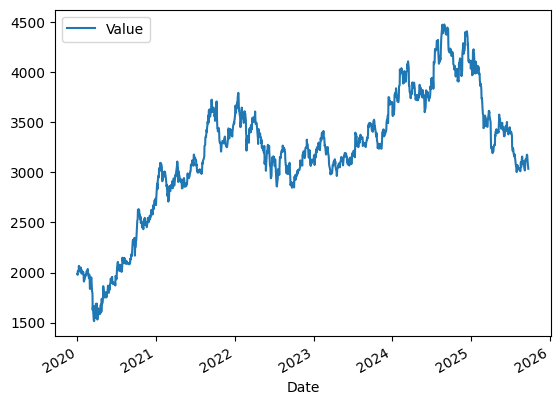

In [279]:
tcs_close = stock_DF_long[(stock_DF_long['Ticker']=='TCS.NS') & (stock_DF_long['Metric']=='Close')]
tcs_close_plot=tcs_close.plot(x='Date', y='Value')
tcs_close_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\tcs_close_plot.png",bbox_inches="tight")

### filtering all stock close for comparison

In [280]:
closed_df=stock_DF_long[stock_DF_long["Metric"]=="Close"]
closed_df

,Date,Value,Metric,Ticker
0,2020-01-01,646.518677,Close,INFY.NS
1,2020-01-02,644.632385,Close,INFY.NS
2,2020-01-03,654.547119,Close,INFY.NS
3,2020-01-06,648.273560,Close,INFY.NS
4,2020-01-07,638.665833,Close,INFY.NS
...,...,...,...,...
4261,2025-09-18,3176.699951,Close,TCS.NS
4262,2025-09-19,3169.199951,Close,TCS.NS
4263,2025-09-22,3073.800049,Close,TCS.NS
4264,2025-09-23,3062.399902,Close,TCS.NS


### converting into wide format for better visualization

In [281]:
closed_df=closed_df.pivot_table(index="Date",
                      columns="Ticker",
                     values="Value")
closed_df

Ticker,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,
2020-01-01,646.518677,675.324158,1986.125366
2020-01-02,644.632385,686.821228,1977.007935
2020-01-03,654.547119,687.648804,2016.408203
2020-01-06,648.273560,671.700623,2016.225342
2020-01-07,638.665833,682.034546,2021.172729
...,...,...,...
2025-09-18,1540.599976,1415.000000,3176.699951
2025-09-19,1540.199951,1407.400024,3169.199951
2025-09-22,1499.500000,1390.599976,3073.800049


### plotting  coparison_stock_plot between all stock 

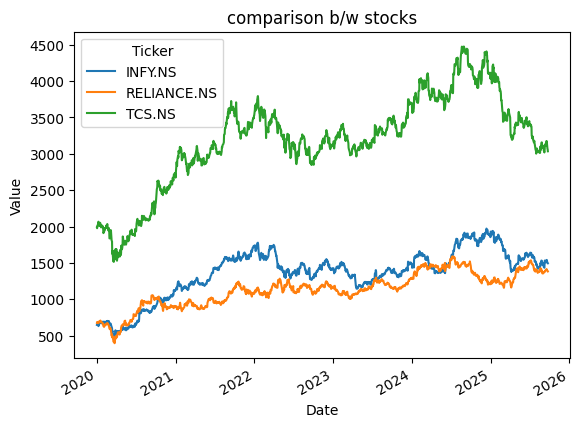

In [282]:
coparison_stock_plot=closed_df.plot(
    title="comparison b/w stocks",
    xlabel="Date",
    ylabel="Value",
              )
coparison_stock_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\coparison_stock_plot.png",bbox_inches="tight")

### - - 90-day MA plot: Long-term trend



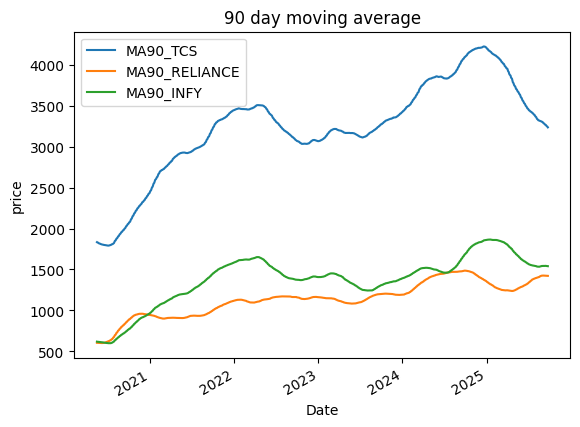

In [291]:
# tcs_ma90 = stock_DF_long[(stock_DF_long["Metric"]=="stock_TCS") & (stock_DF_long["Ticker"]=="MA90")]
# tcs_ma90.pivot(
#     index="Date",
    
# )
MA_90Day_plot=stock_DF.set_index("Date")[ ["MA90_TCS","MA90_RELIANCE","MA90_INFY"]].plot(title= "90 day moving average",
                               xlabel="Date",
                               ylabel="price")
MA_90Day_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\MA_90Day_plot.png",bbox_inches="tight")

### - 90-day rolling volatility plot
#### -- Insight: High line → risky stock, Low line → stable stock



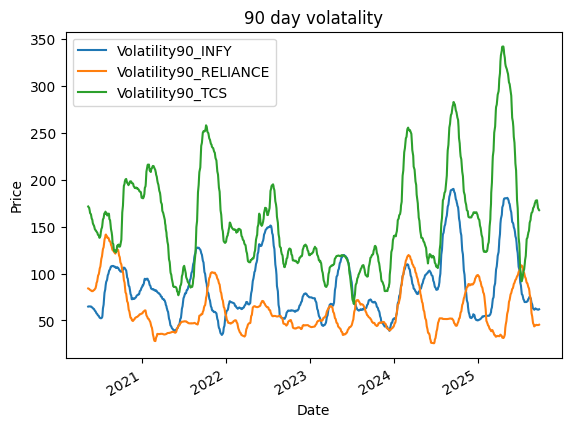

In [292]:
volatality_90Days_plot=stock_DF.set_index("Date")[["Volatility90_INFY","Volatility90_RELIANCE","Volatility90_TCS"]].plot(
    title="90 day volatality",
    xlabel="Date",
    ylabel="Price"
    
)
volatality_90Days_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\volatality_90Days_plot.png",bbox_inches="tight")

### - Plotted line chart of daily returns
#### - Insight: Identify extreme returns, high-risk periods


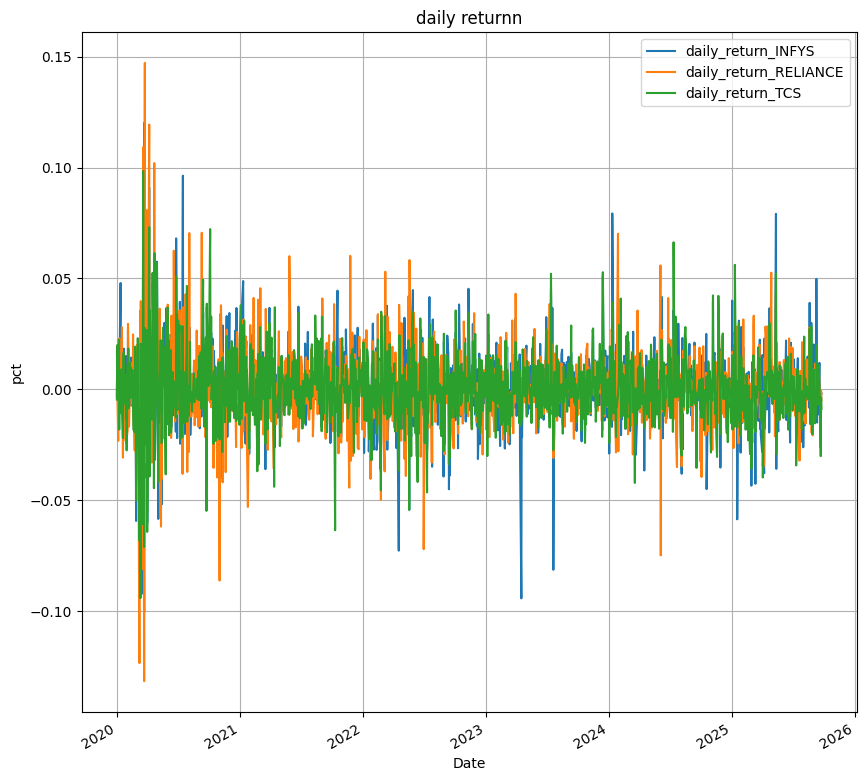

In [293]:
daily_return_plot=stock_DF.set_index("Date")[["daily_return_INFYS","daily_return_RELIANCE","daily_return_TCS"]].plot(
    title="daily returnn",
    xlabel="Date",
    ylabel="pct",
    figsize=(10,10),
    grid=True

)
daily_return_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\daily_return_plot.png",bbox_inches="tight")

### comparing close and 90day mooving average of TCS

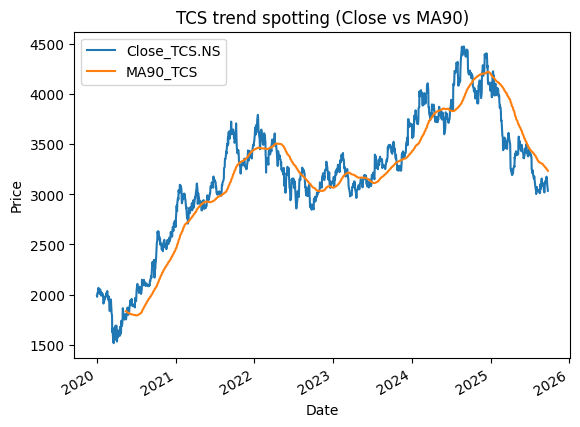

In [294]:
TCS_trend_plot=stock_DF.set_index("Date")[["Close_TCS.NS","MA90_TCS"]].plot(
    title="TCS trend spotting (Close vs MA90)",
    xlabel="Date",
    ylabel="Price")
TCS_trend_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\TCS_trend_plot.png",bbox_inches="tight")

#### calculating 20 day MA 

In [287]:
stock_DF=stock_DF.assign(
    stock_INFY_MA20=stock_DF["Close_INFY.NS"].rolling(20).mean(),
    stock_RELIANCE_MA20=stock_DF["Close_RELIANCE.NS"].rolling(20).mean(),
    stock_TCS_MA20=stock_DF["Close_TCS.NS"].rolling(20).mean()
    
)
stock_DF

,Date,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_INFY.NS,High_RELIANCE.NS,High_TCS.NS,Low_INFY.NS,Low_RELIANCE.NS,Low_TCS.NS,...,MA90_TCS,daily_return_INFYS,daily_return_RELIANCE,daily_return_TCS,Volatility90_INFY,Volatility90_RELIANCE,Volatility90_TCS,stock_INFY_MA20,stock_RELIANCE_MA20,stock_TCS_MA20
0,2020-01-01,646.518677,675.324158,1986.125366,649.282532,683.152832,2001.060547,642.745850,673.490051,1973.663940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,644.632385,686.821228,1977.007935,649.984558,689.348816,1997.441040,641.298218,676.397888,1969.265381,...,NaN,-0.002918,0.017025,-0.004591,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,654.547119,687.648804,2016.408203,656.301941,689.661865,2036.887085,643.930481,681.318726,1982.826660,...,NaN,0.015381,0.001205,0.019929,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,648.273560,671.700623,2016.225342,661.390808,683.510681,2039.590454,646.211670,670.134888,2004.725952,...,NaN,-0.009585,-0.023192,-0.000091,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,638.665833,682.034546,2021.172729,651.563721,686.463318,2029.235840,636.209045,677.068909,2000.968750,...,NaN,-0.014820,0.015385,0.002454,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2025-09-18,1540.599976,1415.000000,3176.699951,1555.000000,1422.000000,3203.000000,1538.500000,1410.699951,3161.399902,...,3253.402607,0.011955,0.000849,0.001229,61.632456,45.088798,172.407602,1501.054993,1385.270007,3109.804980
1418,2025-09-19,1540.199951,1407.400024,3169.199951,1551.300049,1417.000000,3180.500000,1520.099976,1403.599976,3144.000000,...,3249.323055,-0.000260,-0.005371,-0.002361,61.421951,45.049477,169.963562,1503.689990,1385.180011,3115.564978
1419,2025-09-22,1499.500000,1390.599976,3073.800049,1514.699951,1410.699951,3106.899902,1482.000000,1388.000000,3065.000000,...,3244.387657,-0.026425,-0.011937,-0.030102,61.524599,45.092825,168.517459,1502.059991,1384.080011,3112.224976
1420,2025-09-23,1497.500000,1389.800049,3062.399902,1513.000000,1395.000000,3080.699951,1493.000000,1376.800049,3052.000000,...,3239.792068,-0.001334,-0.000575,-0.003709,61.698498,45.210902,167.768134,1500.454993,1384.325012,3107.484973


#### 20 day mooving average plotting 

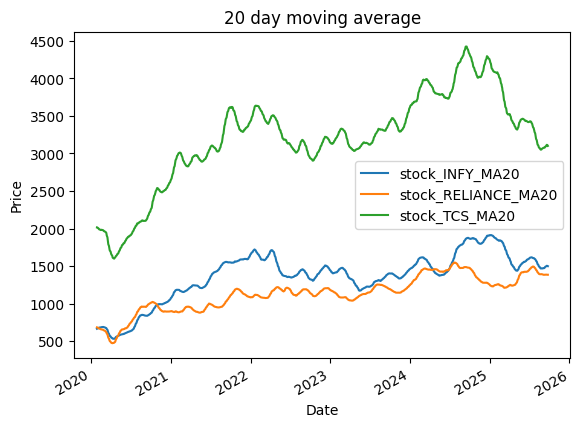

In [288]:
MA_20Day_plot=stock_DF.set_index("Date")[["stock_INFY_MA20","stock_RELIANCE_MA20","stock_TCS_MA20"]].plot(
    title="20 day moving average",
    xlabel="Date",
    ylabel="Price"
)
MA_20Day_plot.figure.savefig(r"D:\Data_science_projects\Trading_Trends_Explorer\Output\MA_20Day_plot.png",bbox_inches="tight")

In [301]:
stock_DF_long["Metric"].unique()


array(['Close', 'MA90', 'daily_return', 'Volatility90'], dtype=object)

### Insert a small preview using summary.csv

In [303]:
summary_cols = ["Date","Ticker","Metric","Value"]
summary_DF = stock_DF_long[stock_DF_long["Metric"].isin(["Close","MA90","daily_return","Volatility90"])][summary_cols]

summary_DF.to_csv(r"D:\Data_science_projects\Trading_Trends_Explorer\Report\summary.csv", index=False)

## conclusion and key points

#### -> handle real world data set 
#### -> clean and filter the data
#### ->feature engineering 
#### ->visulize the data